In [1]:
# from find_groups import *
import numpy as np



#### aiida importation
import aiida
%load_ext aiida
%aiida

from aiida.orm import QueryBuilder
from aiida.engine import run
from aiida.orm.groups import Group
from aiida.orm import Dict, KpointsData, StructureData, load_code, load_group

In [2]:
from ase.atoms import Atoms
import ase 
from copy import deepcopy

In [3]:
import importlib 
import band_analyse as bana
import analyse_symmetry as ans
importlib.reload(bana)
importlib.reload(ans)
from band_analyse import *
from analyse_symmetry import Atoms_symmetry_group_direct_space

In [4]:
from collections.abc import Iterable

In [5]:
### assigne some type to types alias
# Using typing module
from typing import TypeAlias

CalcFunctionNode : TypeAlias = aiida.orm.nodes.process.calculation.calcfunction.CalcFunctionNode
BandsData : TypeAlias = aiida.orm.nodes.BandsData
JobCalculation : TypeAlias = aiida.orm.nodes.process.calculation.calcjob.CalcJobNode
Node : TypeAlias = aiida.orm.nodes.Node



In [9]:
! verdi group list -a -A

  PK  Label                                                                               Type string    User
----  ----------------------------------------------------------------------------------  -------------  ---------------------------
  21  20220621-191136                                                                     core.import    aiida@prnmarvelsrv3.epfl.ch
   1  20220622-101846                                                                     core.import    aiida@prnmarvelsrv3.epfl.ch
  24  20241219-161610                                                                     core.import    junlin.yin@umontpellier.fr
   5  absolute_magnetization                                                              core           aiida@prnmarvelsrv3.epfl.ch
  20  all_MC2D_uuids_20220613                                                             core           aiida@prnmarvelsrv3.epfl.ch
   8  band_gap                                                                            cor

In [7]:
aiida_group_MC2D = load_group('all_MC2D_uuids_20220613')

In [17]:
aiida_group_MC2D.count()

23563

In [5]:
bands = load_group("bands_2D") ### dans le group band_2D, les BZ sont irreducdible
bands_gap = load_group("band_gap")
structures = load_group("structure_2D")

In [11]:
for node in bands.nodes:
    print(node)


uuid: 0d33d33e-abda-41e6-88ca-1ad38b72c1b5 (pk: 287766)
uuid: 408b8879-ca42-44c7-92d5-d825148b9dd8 (pk: 287958)
uuid: 56900e76-5e1c-490d-9995-a6080b55a9da (pk: 288058)
uuid: 62d6ec38-ee73-4e52-9fa9-aeccde38a10f (pk: 288102)
uuid: 80dad90c-94dd-435e-8ed4-09d18a2526c1 (pk: 288232)
uuid: 2400dc41-690e-4af2-8ca8-32ecf67e9264 (pk: 287848)
uuid: 6744c6df-6b82-4c17-a424-0ac9bfb98def (pk: 288123)
uuid: 1777eec0-ca9c-4598-a498-d55d61b8439f (pk: 288810)
uuid: de526324-e607-4848-a195-919b775cb0b2 (pk: 289578)
uuid: 52c19c15-d03e-484f-a887-f1aa11c11f3b (pk: 289026)
uuid: a8352c79-33c6-43ce-a69f-d3df3b1b3bbd (pk: 289375)
uuid: a3265850-c688-4028-b862-74e0ce715884 (pk: 289353)
uuid: 41e21c7e-2b38-4d9a-9c5f-db6f32da85bf (pk: 288964)
uuid: 9b95c0e4-5165-4dad-8218-f94c36deb32a (pk: 289320)
uuid: ec35ef76-a996-46fe-a3fb-cad065c9068b (pk: 289632)
uuid: d18f8bf8-6b67-4b7d-9014-7afc5c313e16 (pk: 289524)
uuid: 05400893-24f1-49b7-9bd3-8a539fbecb71 (pk: 289729)
uuid: 139daf85-f48b-4649-8c41-d672dbce410c (pk: 

In [12]:
band_eg = load_node(289729)

In [13]:
band_eg.creator.inputs.parent_calc_folder.creator

<CalcJobNode: uuid: c006a1fa-e55f-4ce8-8ed6-68d8a8fb2adc (pk: 292459) (aiida.calculations:quantumespresso.pw)>

In [14]:
calcc = band_eg.creator.inputs.parent_calc_folder.creator

In [15]:
with calcc.outputs.retrieved.open("aiida.out") as handle:
    out = handle.readlines()
out

['\n',
 '     Program PWSCF v.5.1 starts on 16Nov2019 at 16:44:41 \n',
 '\n',
 '     This program is part of the open-source Quantum ESPRESSO suite\n',
 '     for quantum simulation of materials; please cite\n',
 '         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);\n',
 '          URL http://www.quantum-espresso.org", \n',
 '     in publications or presentations arising from this work. More details at\n',
 '     http://www.quantum-espresso.org/quote\n',
 '\n',
 '     Parallel version (MPI), running on   128 processors\n',
 '     K-points division:     npool     =       8\n',
 '     R & G space division:  proc/nbgrp/npool/nimage =      16\n',
 '     Reading input from aiida.in\n',
 '\n',
 '     Current dimensions of program PWSCF are:\n',
 '     Max number of different atomic species (ntypx) = 10\n',
 '     Max number of k-points (npk) =  40000\n',
 '     Max angular momentum in pseudopotentials (lmaxx) =  3\n',
 '\n',
 '     Subspace diagonalization in iterative s

In [6]:
nodes_bands_gaps = bands_gap.nodes
print(type(nodes_bands_gaps[0]))
print(type(nodes_bands_gaps[0]._CLS_NODE_LINKS))
for band_gap in nodes_bands_gaps :

    f = band_gap
    uuid = band_gap.uuid
    print(uuid)
    
    
    

<class 'aiida.orm.nodes.process.calculation.calcfunction.CalcFunctionNode'>
<class 'type'>
097124b1-d713-423e-aaca-0e71c62a1ea7
73125a5e-8d74-4ef1-9eef-335aa87d4586
6dcb8146-e5e5-4c99-bae5-3e5791986fc9
4c1911b5-3248-4003-a98c-4df4786d5318
6b3f708e-364e-48c9-aec9-f2d28b41e235
c025968b-a2b3-4d4e-ace4-baaeb1d2a997
90deb145-733d-4e4c-bcc5-5bbd88640d32
d840ecb0-1d74-4d1c-a38e-c1065cd4acf3
7c0102f6-da18-4153-a1bd-21d8ede0e999
bc7e6b03-aed3-48ca-bcfd-d0b4067e1883
bd00a895-2c7d-4a03-bf31-d940c5efc564
fa8b01ab-0fb8-42a9-b8e1-8724f71e39ed
afe84ac8-8827-489a-8718-f3305dd00d52
ac5132b6-8dfb-4a42-842e-816bdcf6d563
77f92dbc-c677-4f47-b910-31f9ebb7b7cb
d62f116f-8b79-432b-a0d3-8733af31e1d4
ac4b85e7-f3b3-4c2e-9e59-39d27e1c7e19
f730de1e-cdfc-4ee2-a292-cfedfbc58c70
36a4d6e3-1be0-4dff-94e7-67c77a867694
5fd637fa-2c77-4453-aaee-7682f5c71df6
698cc00d-fae2-448d-9f9f-e166fd62d73f
0ca2aa6b-db96-42f1-834c-2ea0d8974518
cb3646c6-ed9e-409b-9833-778f9a0180e9
720974fe-154d-4010-9640-c55a6ab306fb
991b1f85-840c-4568-9f

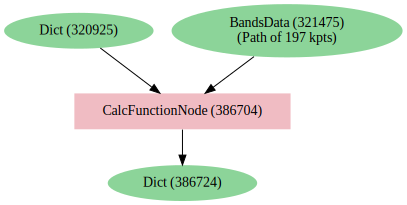

In [20]:
from aiida.tools.visualization import Graph

g = Graph()
g.add_node(f.uuid)
g.add_outgoing(f.uuid, return_pks=False)
g.add_incoming(f.uuid, return_pks=False)

g.graphviz

# g.nodes

In [21]:
nodes = g.nodes
nodes
# for n in nodes :
#     print(n)
#     print(type(n))


{320925, 321475, 386704, 386724}

In [22]:
band_gap_datanode = g._load_node(388021)
print(type(band_gap_datanode))
dict_band_gap = band_gap_datanode.get_dict()
dict_band_gap

<class 'aiida.orm.nodes.data.dict.Dict'>


{'band_gap': 2.85715907838125, 'is_insulator': True, 'band_gap_units': 'eV'}

#### we know the band gap is calculated from the banddata. its time to find the recursive input from the band data, util the structure.

In [23]:
g.recurse_ancestors(f.uuid) 

/home/jyin/miniconda3/envs/aiida/lib/python3.12/site-packages/aiida/orm/nodes/data/code/legacy.py:602: AiidaDeprecationWarning: `Code.get_execname` method is deprecated, use `get_executable` instead. (this will be removed in v3)
  warn_deprecation('`Code.get_execname` method is deprecated, use `get_executable` instead.', version=3)
/home/jyin/miniconda3/envs/aiida/lib/python3.12/site-packages/aiida/orm/nodes/data/code/legacy.py:573: AiidaDeprecationWarning: `Code.is_local` method is deprecated, use a `PortableCode` instance and check the type. (this will be removed in v3)
  warn_deprecation(
/home/jyin/miniconda3/envs/aiida/lib/python3.12/site-packages/aiida/orm/nodes/data/code/legacy.py:524: AiidaDeprecationWarning: `Code.get_remote_exec_path` method is deprecated, use `InstalledCode.filepath_executable` instead. (this will be removed in v3)
  warn_deprecation(


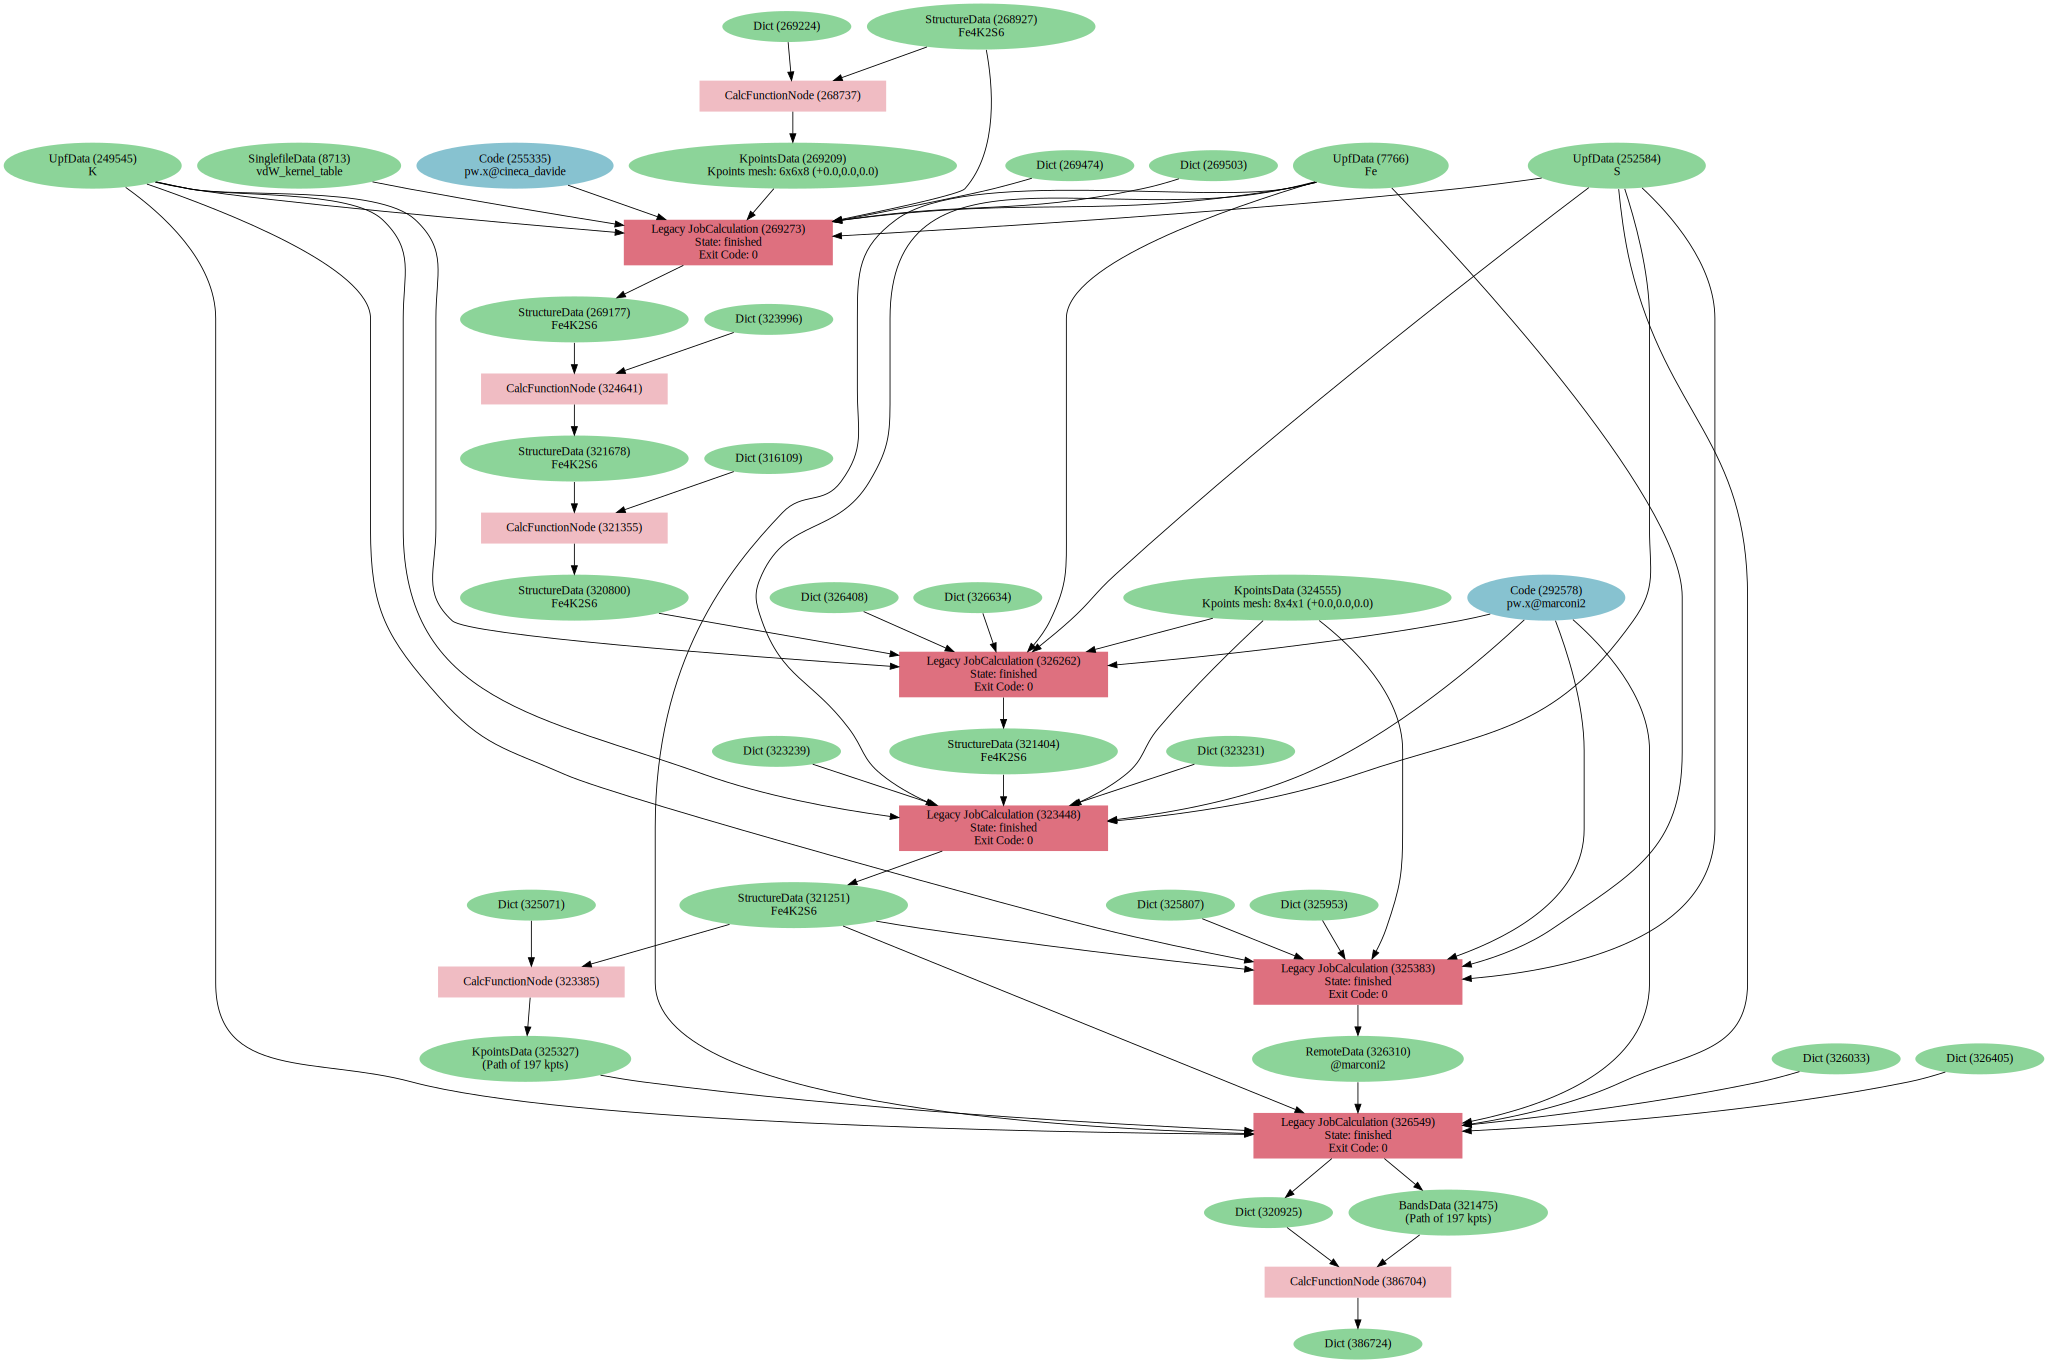

In [24]:
g.graphviz

In [25]:

#### find the band data and its incoming


for n in nodes:
    
    node = g._load_node(n)
    node_type_short = node.node_type.split('.')[-2] 
    print(node.node_type)
    if node_type_short == 'BandsData':
        g.add_incoming(node.uuid) 
    


process.calculation.calcfunction.CalcFunctionNode.
data.core.array.bands.BandsData.
data.core.dict.Dict.
data.core.dict.Dict.


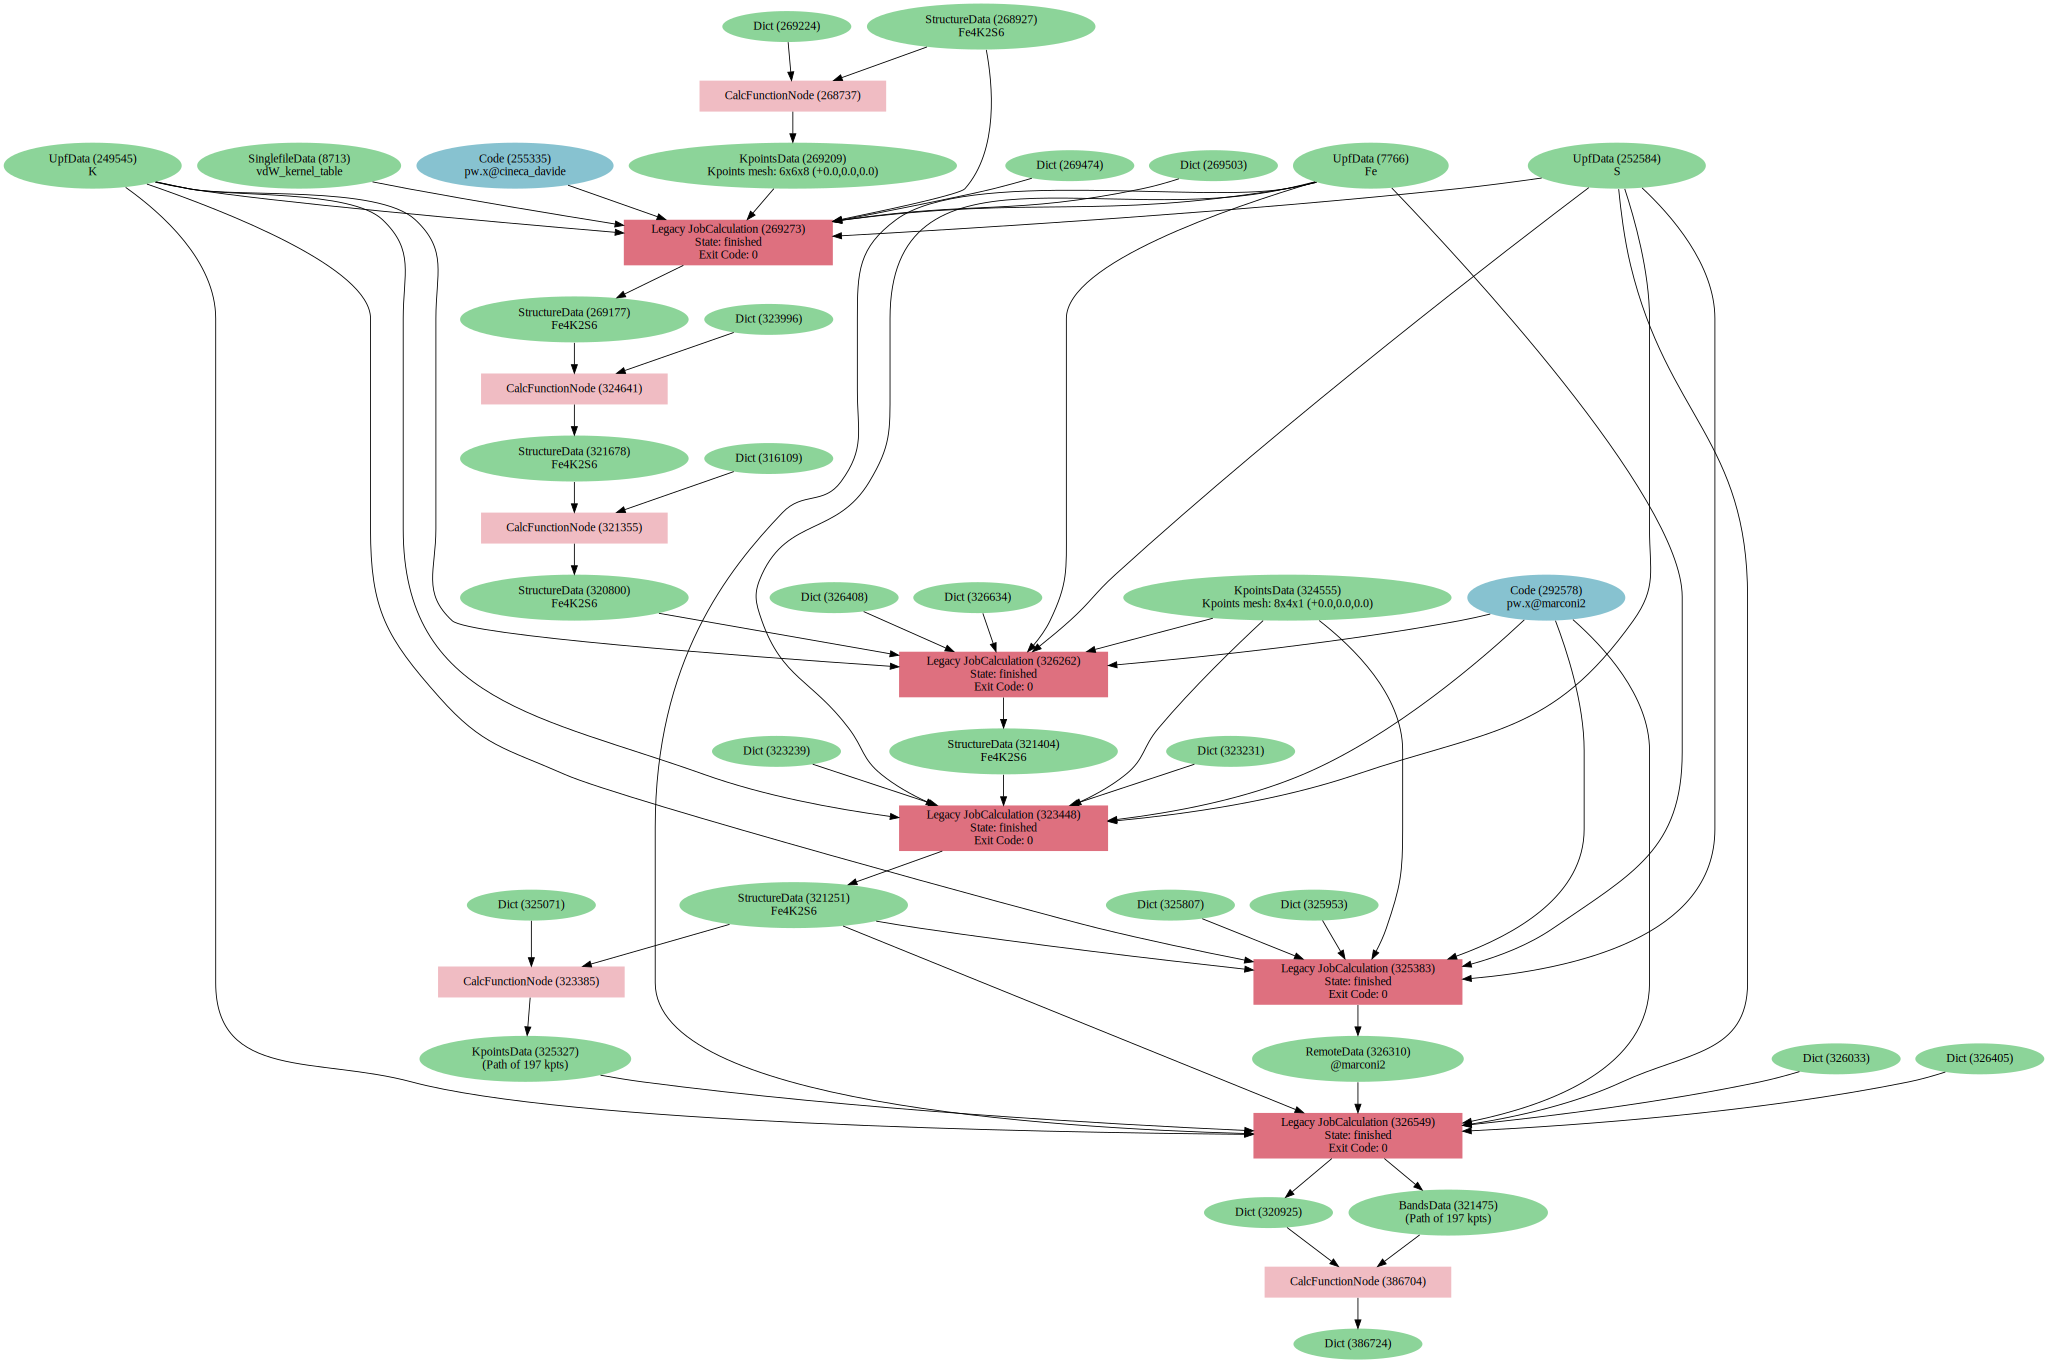

In [26]:
g.graphviz

In [27]:
#### ok, the band
jc = g._load_node(326549)
print(type(jc))

<class 'aiida.orm.nodes.process.calculation.calcjob.CalcJobNode'>


#### from the structures data, find band gap and band's data.

In [ ]:
nodes_structure_2D = structures.nodes
pks_node_struc_2D = []
for node in nodes_structure_2D:
    pks_node_struc_2D.append(node.pk)

pks_node_struc_2D = np.array(pks_node_struc_2D)
# length = len(pks_node_struc_2D)
pk_random = pks_node_struc_2D[13]

node_random = load_node(pk_random)

NameError: name 'structures' is not defined

In [29]:
node_random

<StructureData: uuid: 7fccc497-b0a4-4a30-8f3f-422030d71076 (pk: 188320)>

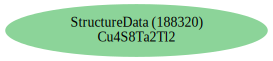

In [30]:
g1 = Graph()
g1.add_node(node_random)
g1.graphviz

In [31]:
g1.add_outgoing(node_random)
g1.recurse_descendants(node_random)

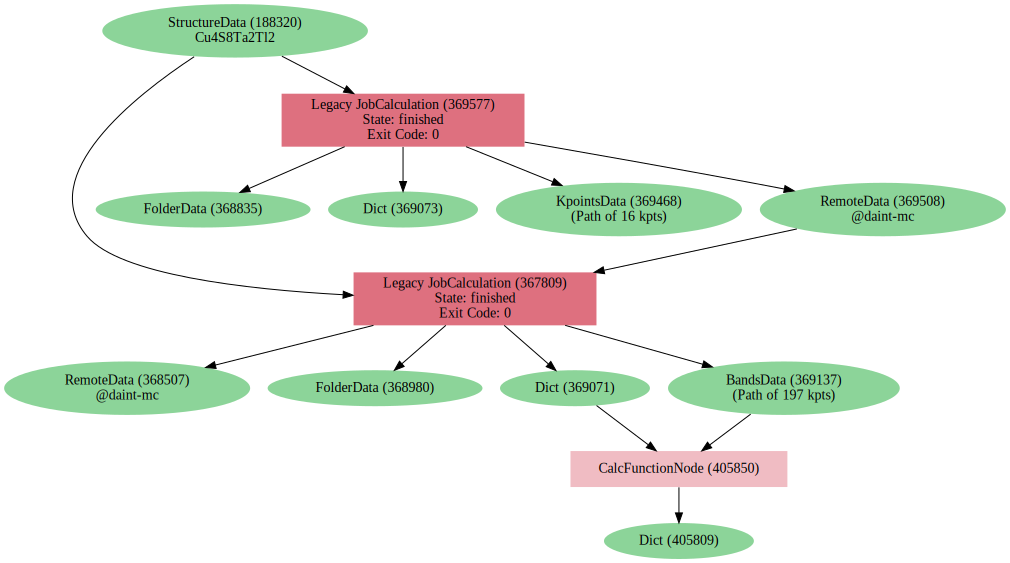

In [32]:
g1.graphviz

In [35]:
nodes_g1 = g1.nodes
#### get the band structure from the node of structure_2D
pk_node_bandsData_g1 = find_nodes_in_group(nodes_g1, pks_group_bands)


In [36]:
pk_node_bandgap_g1 = find_nodes_in_group(nodes_g1, pks_group_bands_gap)

In [37]:
node_bandsData_g1 = load_node(pk_node_bandsData_g1[0]) ### until here, we've get the node of BandsData of g1

In [39]:
creator_node_bandsData_g1 = node_bandsData_g1.creator

In [ ]:
creator_node_bandsData_g1

In [44]:
dict_output_bandsData_g1 = creator_node_bandsData_g1.outputs.output_parameters

In [48]:
output_bandsData_g1 = creator_node_bandsData_g1.outputs

In [53]:
output_bandsData_g1.output_band

<BandsData: uuid: 80992c58-c3f2-4ad2-9474-5f5b324f0bf1 (pk: 369137)>

In [47]:
dict_output_bandsData_g1.get_dict()

{'lsda': False,
 'volume': 1364.52940035251,
 'fft_grid': [72, 100, 400],
 'warnings': ['c_bands: at least 1 eigenvalues not converged'],
 'wall_time': '        9h32m ',
 'rho_cutoff': 6095.3498929344,
 'symmetries': [{'t_rev': '0', 'symmetry_number': 0},
  {'t_rev': '0', 'symmetry_number': 35},
  {'t_rev': '0', 'symmetry_number': 33},
  {'t_rev': '0', 'symmetry_number': 34}],
 'wfc_cutoff': 653.0732028144,
 'format_name': 'qexml',
 'lkpoint_dir': True,
 'parser_info': 'AiiDA QE Parser v0.1',
 'creator_name': 'pwscf',
 'fermi_energy': -3.00271647447823,
 'q_real_space': False,
 'xml_warnings': [],
 'pp_check_flag': True,
 'charge_density': './charge-density.xml',
 'constraint_mag': 0,
 'format_version': '1.4.0',
 'k_points_units': '2 pi / Angstrom',
 'linknames_band': ['output_band'],
 'beta_real_space': False,
 'creator_version': '5.1',
 'number_of_atoms': 16,
 'number_of_bands': 158,
 'parser_warnings': [],
 'smearing_method': True,
 'smooth_fft_grid': [48, 72, 270],
 'rho_cutoff_uni

In [172]:
kpoints = node_bandsData_g1.get_kpoints() ## this BZ is irreducible
np.shape(kpoints)

(197, 3)

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [173]:
kpoints_xy = kpoints[:,:2]

In [174]:
#### find kpoints convex hull form :
contour_hull = ConvexHull(kpoints_xy)

In [175]:
vertexs_indices = contour_hull.vertices


In [176]:
contour_hull.simplices

array([[ 49,   0],
       [ 98,  49],
       [147,   0],
       [147,  98]], dtype=int32)

In [177]:
vertexs_coord = kpoints[vertexs_indices]
vertexs_coord 

array([[0. , 0. , 0. ],
       [0.5, 0. , 0. ],
       [0.5, 0.5, 0. ],
       [0. , 0.5, 0. ]])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(kpoints_xy[:,0], kpoints_xy[:,1], 'o')
plt.xlabel('kx (fractional??)')
plt.ylabel('ky (fractional??)')
plt.rcParams.update({'font.size': 20})
for simplex in contour_hull.simplices:

    plt.plot(kpoints_xy[simplex, 0], kpoints_xy[simplex, 1], 'k-')

NameError: name 'kpoints_xy' is not defined

#### grille de k point band (utiliser pour faire les calcul trouver les densité de charge dans DFT)

In [76]:
inputs_creator = node_bandsData_g1.creator.inputs

In [105]:
remote_data = inputs_creator.parent_calc_folder

In [108]:
cre_remote_data = remote_data.creator

In [ ]:
inp = cre_remote_data.inputs

In [151]:
out = cre_remote_data.outputs

In [153]:
out_para = out.output_parameters

In [156]:
calc = node_bandsData_g1.creator.inputs.parent_calc_folder.creator
with calc.outputs.retrieved.open("aiida.out") as handle:
    out = handle.readlines()

In [ ]:
out

In [157]:
import re
nbnds = calc.outputs.output_parameters.get_dict()['number_of_bands']
k = []
ek = []
with calc.outputs.retrieved.open("aiida.out") as handle:
    energy_to_read = False
    for line in handle:
        if " k = " in line:
            k.append(np.array([float(x) for x in re.findall(r'-?\s?\d+\.\d+', line)]))
            energy_to_read = True
            energies = []
            continue
        if energy_to_read:
            energies += [float(x) for x in re.findall(r'-?\d+\.\d+', line)]
            if len(energies)==nbnds:
                energy_to_read = False
                ek.append(energies)
k = np.array(k)
ek = np.array(ek)

In [159]:
len(k)

12

In [161]:
np.shape(ek)

(12, 158)

Text(0, 0.5, 'ky')

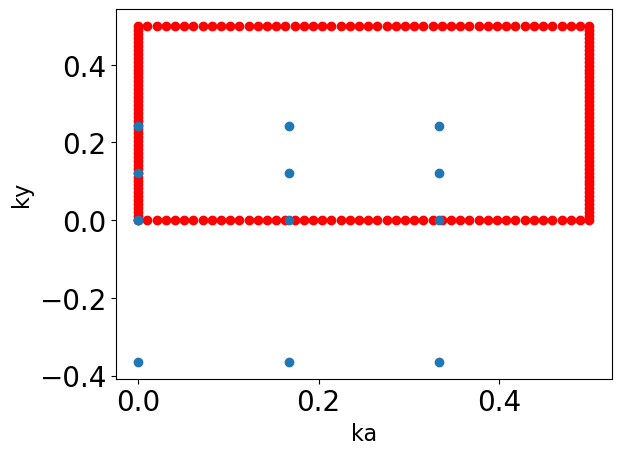

In [181]:
import matplotlib.pyplot as plt
plt.plot(kpoints_xy[:,0], kpoints_xy[:,1], 'o', color = 'red')
plt.plot(k[:,0], k[:,1], 'o')

# plt.rcParams.update({'font.size': 5})
plt.xlabel('ka', fontsize =16)
plt.ylabel('ky', fontsize =16)
# for simplex in contour_hull_g1.simplices:

#     plt.plot(kpoints_xy[simplex, 0], kpoints_xy[simplex, 1], 'k-')

In [ ]:
#####Note, the kpoint where we do the DFT are paths, not an area

In [ ]:
bands_arrays = node_bandsData_g1.get_bands() ### we have of cause more than one band of different n
print(np.shape(bands_arrays))
N_k_points, N_n = np.shape(bands_arrays)

(197, 158)


'number_of_spin_components' 1 non magnetic, else magnetic

In [ ]:
pw1.outputs.output_parameters.get_dict()

{'lsda': False,
 'volume': 1364.52940035251,
 'fft_grid': [72, 100, 400],
 'warnings': ['c_bands: at least 1 eigenvalues not converged'],
 'wall_time': '        9h32m ',
 'rho_cutoff': 6095.3498929344,
 'symmetries': [{'t_rev': '0', 'symmetry_number': 0},
  {'t_rev': '0', 'symmetry_number': 35},
  {'t_rev': '0', 'symmetry_number': 33},
  {'t_rev': '0', 'symmetry_number': 34}],
 'wfc_cutoff': 653.0732028144,
 'format_name': 'qexml',
 'lkpoint_dir': True,
 'parser_info': 'AiiDA QE Parser v0.1',
 'creator_name': 'pwscf',
 'fermi_energy': -3.00271647447823,
 'q_real_space': False,
 'xml_warnings': [],
 'pp_check_flag': True,
 'charge_density': './charge-density.xml',
 'constraint_mag': 0,
 'format_version': '1.4.0',
 'k_points_units': '2 pi / Angstrom',
 'linknames_band': ['output_band'],
 'beta_real_space': False,
 'creator_version': '5.1',
 'number_of_atoms': 16,
 'number_of_bands': 158,
 'parser_warnings': [],
 'smearing_method': True,
 'smooth_fft_grid': [48, 72, 270],
 'rho_cutoff_uni

In [ ]:
node_bandsData_g1.get_shape('weights')

(197,)

In [ ]:
node_bandsData_g1.get_shape('occupations')

(197, 158)

In [ ]:
node_bandsData_g1.get_shape('kpoints')

(197, 3)

In [ ]:
bands_arrays

In [ ]:
#### get the ase objet from the node in structure_2D

ase_structure = node_random.get_ase()


In [ ]:
ase_structure_copy = deepcopy(ase_structure)

In [ ]:
ase_structure_copy.edit()

In [ ]:
bravais_lattrice = ase_structure.cell.get_bravais_lattice()

In [ ]:
bravais_lattrice

ase.lattice.ORC

In [ ]:
special_k_points =  bravais_lattrice.get_special_points()
special_k_points

{'G': array([0, 0, 0]),
 'R': array([0.5, 0.5, 0.5]),
 'S': array([0.5, 0.5, 0. ]),
 'T': array([0. , 0.5, 0.5]),
 'U': array([0.5, 0. , 0.5]),
 'X': array([0.5, 0. , 0. ]),
 'Y': array([0. , 0.5, 0. ]),
 'Z': array([0. , 0. , 0.5])}

In [ ]:
band_objet = band_propretys()
band_objet.from_pk_struc2D(188320)

In [ ]:
vBM = band_objet.vBM
cBM = band_objet.cBM


In [ ]:
vBM

{'special point': 'X',
 'k': array([0.5, 0. , 0. ]),
 'vBM energy': -3.678510595962665}

In [ ]:
cBM

{'special point': 'G',
 'k': array([0., 0., 0.]),
 'cBM energy': -2.285302026887906}

#### end of find band structure data, begin of find the band_gap (for a random structure data call above)

In [ ]:
pk_node_band_gap_calc_g1 = find_nodes_in_group(nodes_g1, bands_gap)
node_band_gap_calc_g1 = load_node(pk_node_band_gap_calc_g1[0])

In [ ]:
pk_node_band_gap_calc_g1

[405850]

In [ ]:
node_band_gap_calc_g1

<CalcFunctionNode: uuid: 3d76fe42-2415-4ce2-986e-c106507b30a9 (pk: 405850)>

In [ ]:
band_gap_data_g1 = get_gap_data(node_band_gap_calc_g1)
band_gap_data_g1.get_dict()

{'band_gap': 1.39320856907476, 'is_insulator': True, 'band_gap_units': 'eV'}

In [ ]:
#### Do some symmetry analyse in direct space (and a little in reprocical space) with ase Atoms objet.

atoms = node_random.get_ase()

In [ ]:
bravais_lattice = atoms.cell.get_bravais_lattice()
special_k_points = bravais_lattice.get_special_points()

##### debug tests for gene_storage_data

In [ ]:
pk_bug = 186875
node_bug = load_node(pk_bug)


In [ ]:
g_bug = Graph()
g_bug.add_node(node_bug)
g_bug.add_outgoing(node_bug)

[186875]

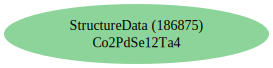

In [ ]:
g_bug.graphviz

In [ ]:
aiida_group_struc2D.count()

2759

#### save a csv of pks of structure 2D to bands proprety

In [185]:
import pandas as pd

In [187]:
path_csv_non_metal = '/home/jyin/workspace/gene_data/pks_struc_2D_diff_cate/pks_non_metal.csv'

In [188]:
pks_non_metal = pd.read_csv(path_csv_non_metal)

In [203]:
dict_pks_non_metal = pks_non_metal.to_dict()['0']

In [204]:
list_pks_non_metal = list(dict_pks_non_metal.values())

In [206]:
def get_df_bands_proprety_from_pks_struc2D(pks_struc2D : list[int]):
    index_df = []
    dic_bands_df = []
    for pk in pks_struc2D:
        index_df.append(pk)
        node = load_node(pk)
        ase_obj = node.get_ase()
        chem_symbol = ase_obj.get_chemical_formula()

        # g = Graph()
        # g.add_node(node)
        # g.recurse_descendants(node)
        # pks_g = g.nodes

        # pk_bandsData = find_nodes_in_group(pks_g, pks_group_bands)
        # node_bandsData = load_node(pk_bandsData)
        bands_info = band_propretys()
        bands_info.from_pk_struc2D(pk)
        dic = bands_info.to_dict()
        dic['chemical formula'] = chem_symbol

        dic_bands_df.append(dic)

    df = pd.DataFrame(dic_bands_df, index=index_df)
    return df

In [207]:
df_bands_proprety_non_metal = get_df_bands_proprety_from_pks_struc2D(list_pks_non_metal)

In [ ]:
df_bands_proprety_non_metal

check if band gap is from vBM and cBM (because the bands vBM and cBM for now are calculate in the edge of irreducible BZ)

In [209]:
indexs = df_bands_proprety_non_metal.index
pks_band_gap_no_match = {}
for i in indexs:
    band_gap_aiida = df_bands_proprety_non_metal.loc[i, 'band gap']
    band_gap_aiida_round4 = round(band_gap_aiida, 4)
    vBM_dict = df_bands_proprety_non_metal.loc[i, 'vBM']
    cBM_dict = df_bands_proprety_non_metal.loc[i, 'cBM']

    vBM_energy = vBM_dict['vBM energy']
    cBM_energy = cBM_dict['cBM energy']

    diff = round(abs(vBM_energy - cBM_energy), 4)

    if diff != band_gap_aiida_round4:
        pks_band_gap_no_match[i] = abs(diff - band_gap_aiida_round4)

In [212]:
pks_band_gap_no_match

{474352: 67.2846,
 475237: 33.942,
 477256: 75.4006,
 476948: 39.168,
 478956: 75.1966,
 479694: 84.1296,
 480034: 83.7585,
 480857: 75.6765,
 482013: 34.784800000000004,
 483478: 74.6811,
 485802: 83.741,
 486679: 67.0452,
 487929: 120.1464,
 491338: 110.0223,
 491446: 54.4094,
 492674: 74.6714,
 495358: 34.41,
 494866: 102.728,
 494560: 84.88019999999999,
 497652: 109.6541,
 498056: 65.9917,
 501471: 24.155199999999997,
 503084: 66.16510000000001,
 503028: 109.1261,
 503771: 58.9274,
 504395: 52.4548,
 504942: 102.2371,
 504977: 65.9551}

In [ ]:
for pk in pks_band_gap_no_match:
    is_mag = df_bands_proprety_non_metal.loc[pk, 'is magnetic']
    print(is_mag)

#### In fact, if band gap save in MC2D is equal to different between vBM and cBM illustrated in BandsData, except magnetic materials 

## Find symmetries in reciprocal space

##### 1.e.g. code

 Exemple Space group polar (R-1)

In [8]:
node_str_eg = load_node(340591) #### Mo4S8
ase_obj_eg = node_str_eg.get_ase()

In [11]:
ase_obj_eg.cell.reciprocal()

Cell([[-0.15474446876856737, 0.08934176069989258, 0.0], [-0.15474446876856737, -0.0893417606998926, 0.0], [0.0, 0.0, 0.05357964202103171]])

In [23]:
eg_spg = Group(187).get_spg_symmetry_object()

In [24]:
eg_spg.opas

[OperationAnalyzer(self.affine_matrix=array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])),
 OperationAnalyzer(self.affine_matrix=array([[-0.5      , -0.8660254,  0.       ,  0.       ],
        [ 0.8660254, -0.5      ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  1.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ,  1.       ]])),
 OperationAnalyzer(self.affine_matrix=array([[-0.5      ,  0.8660254,  0.       ,  0.       ],
        [-0.8660254, -0.5      ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  1.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ,  1.       ]])),
 OperationAnalyzer(self.affine_matrix=array([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  1.]])),
 OperationAnalyzer(self.affine_matrix=array([[-0.5      , -0.8660254,  0.       ,  0.       ],
        [ 0.8660254, -0.5      ,  0.       ,  0.       ],

In [25]:
brav = ase_obj_eg.cell.get_bravais_lattice()